In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import data set
df = pd.read_csv('housing.csv')

# Data Overview

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (20640, 10) 

----------------------------------------
Values: 

 [[-122.23 37.88 41.0 ... 8.3252 452600.0 'NEAR BAY']
 [-122.22 37.86 21.0 ... 8.3014 358500.0 'NEAR BAY']
 [-122.24 37.85 52.0 ... 7.2574 352100.0 'NEAR BAY']
 ...
 [-121.22 39.43 17.0 ... 1.7 92300.0 'INLAND']
 [-121.32 39.43 18.0 ... 1.8672 84700.0 'INLAND']
 [-121.24 39.37 16.0 ... 2.3886 89400.0 'INLAND']] 

----------------------------------------
Columns: 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

----------------------------------------
Short data analyse: 



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Fire Forest data set')
print()
print (missing_values (df))

Missing Values from Fire Forest data set

                    Total   Percent
total_bedrooms        207  1.002907
ocean_proximity         0  0.000000
median_house_value      0  0.000000
median_income           0  0.000000
households              0  0.000000
population              0  0.000000
total_rooms             0  0.000000
housing_median_age      0  0.000000
latitude                0  0.000000
longitude               0  0.000000


In [7]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  


In [8]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

  ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY


# Exploratory Data Analysis

(9.5, -0.5)

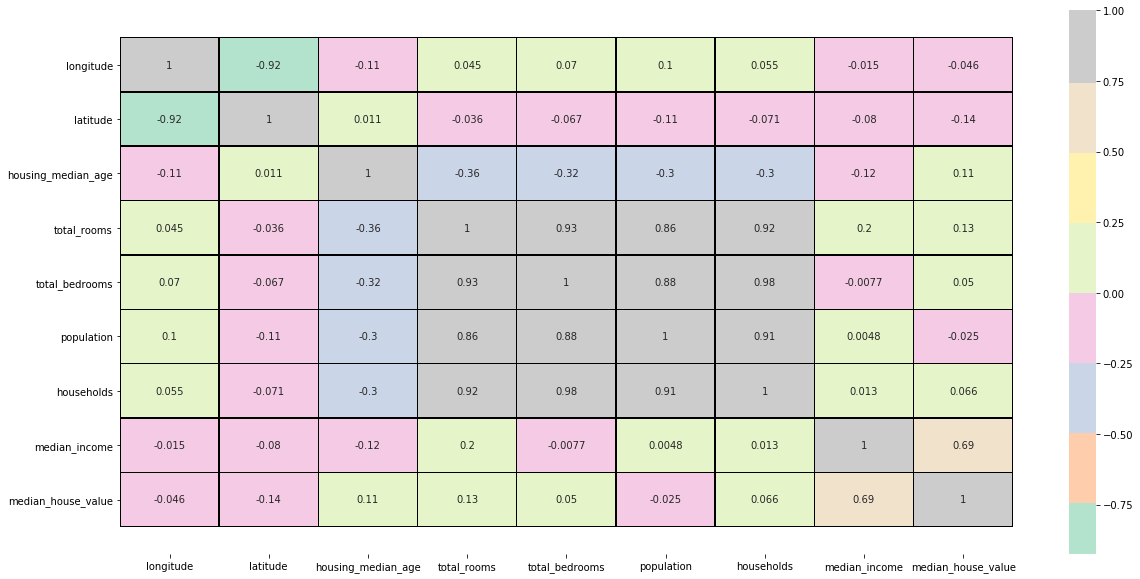

In [9]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Pastel2',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [10]:
df_num= df.drop(categoric_df, axis = 1)
df_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [11]:
num_cols= [col_name for col_name in df_num]
len(num_cols)

9

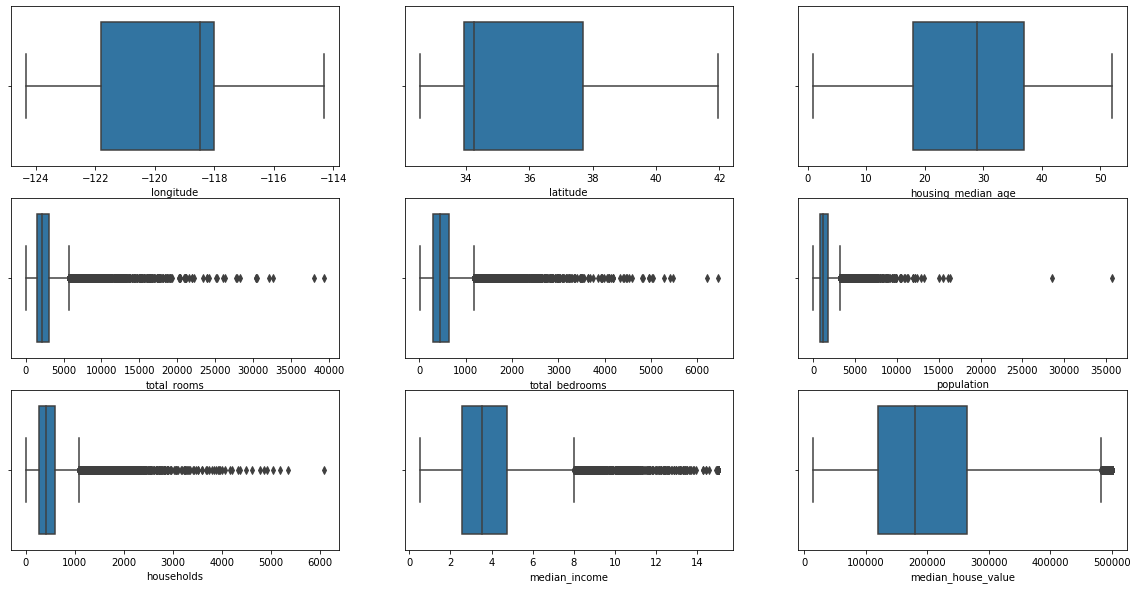

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
start = 0
for j in range(3):
    for i in range(3):
        if start == len(num_cols):
            break
        sns.boxplot(x=num_cols[start], data=df, ax=ax[j, i])
        start += 1

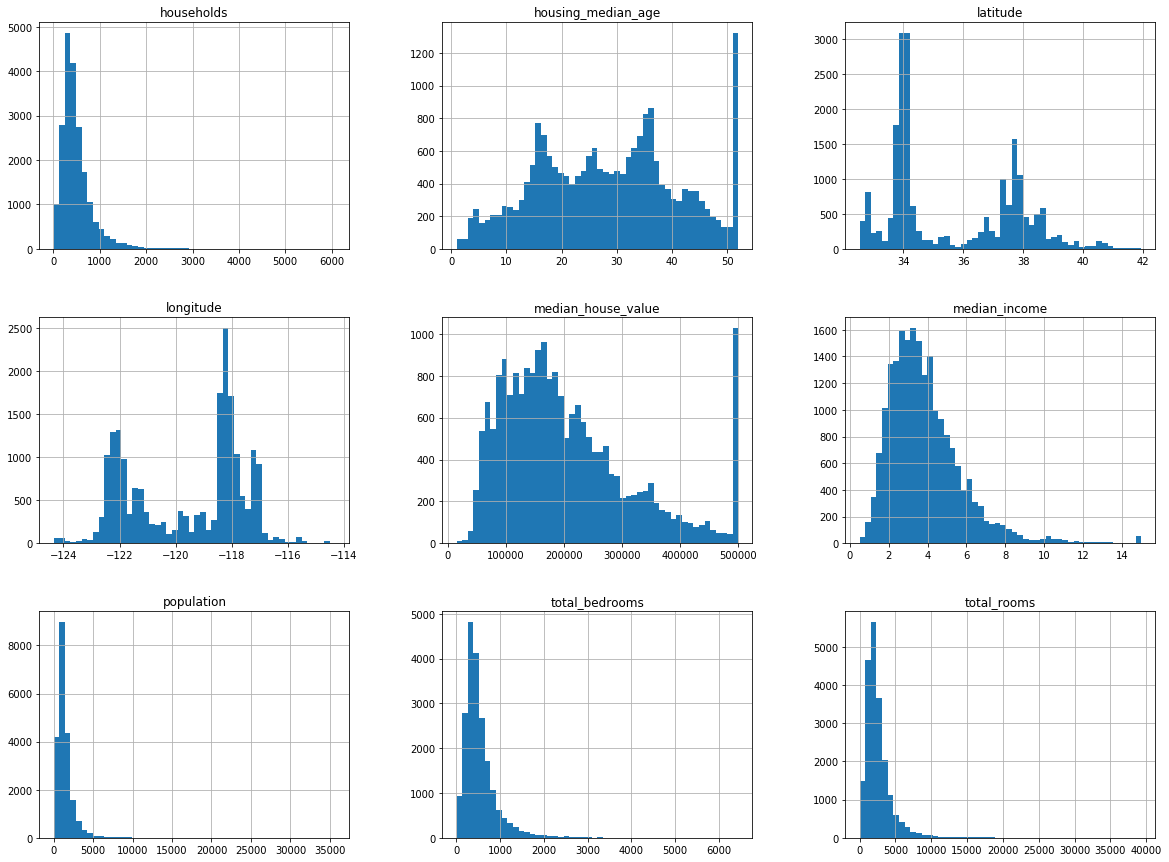

In [13]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

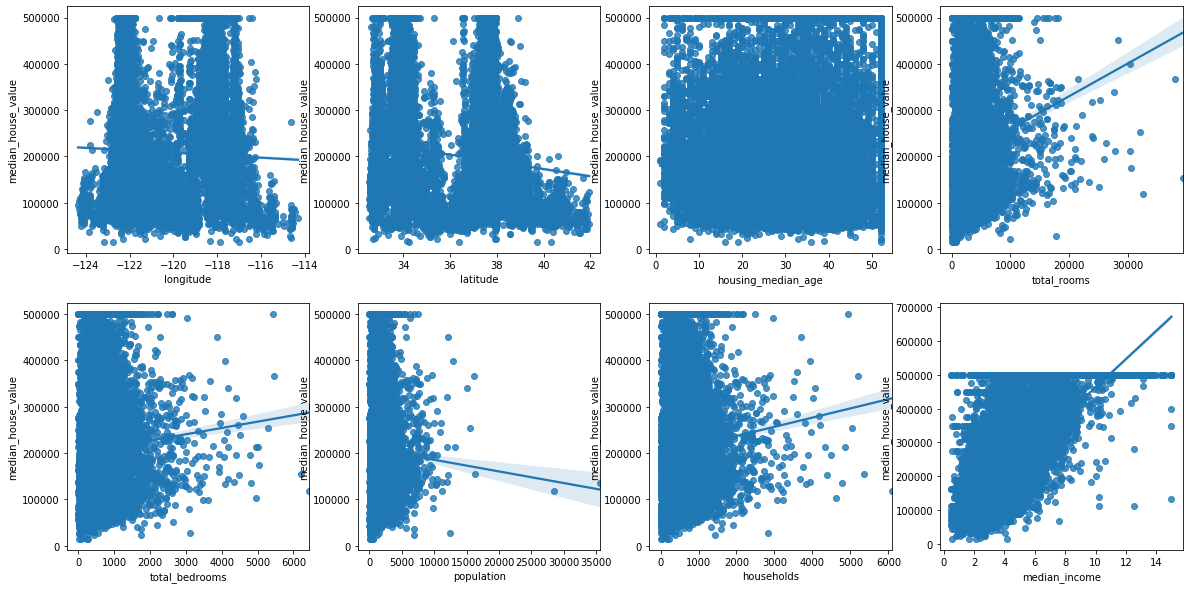

In [14]:
plain_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
start = 0
for j in range(2):
    for i in range(4):
        if start == len(plain_features):
            break
        sns.regplot(x=plain_features[start],
                    y='median_house_value', data=df, ax=ax[j, i])
        start += 1

# Preprosesing

In [15]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df.loc[:,['ocean_proximity']])
df_enc = pd.DataFrame(ohe.transform(df.loc[:, ['ocean_proximity']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(3)

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [17]:
# Now we will merge this tree dataframes df_date, df_enc and df_enc2 by index
df_transform = pd.concat([df,df_enc], axis=1)
df_transform.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


In [18]:
df_ml=df_transform.drop(['ocean_proximity'], axis=1)
df_ml.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [19]:
X = df_ml.drop(['median_house_value'], axis=1)
y = df_ml['median_house_value']
display(X.head(3))
display(y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [20]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16512, 13)
y_train shape: (16512,)
X_test shape: (4128, 13)
y_test shape: (4128,)


In [22]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.677291,0.137088,0.098039,0.015326,0.011639,0.006306,0.010525,0.257838,0.0,1.0,0.0,0.0,0.0
1,0.190239,0.551541,1.000000,0.072920,0.076195,0.041537,0.073343,0.268265,0.0,0.0,0.0,1.0,0.0
2,0.632470,0.137088,0.490196,0.052598,0.059590,0.028560,0.060352,0.236783,1.0,0.0,0.0,0.0,0.0


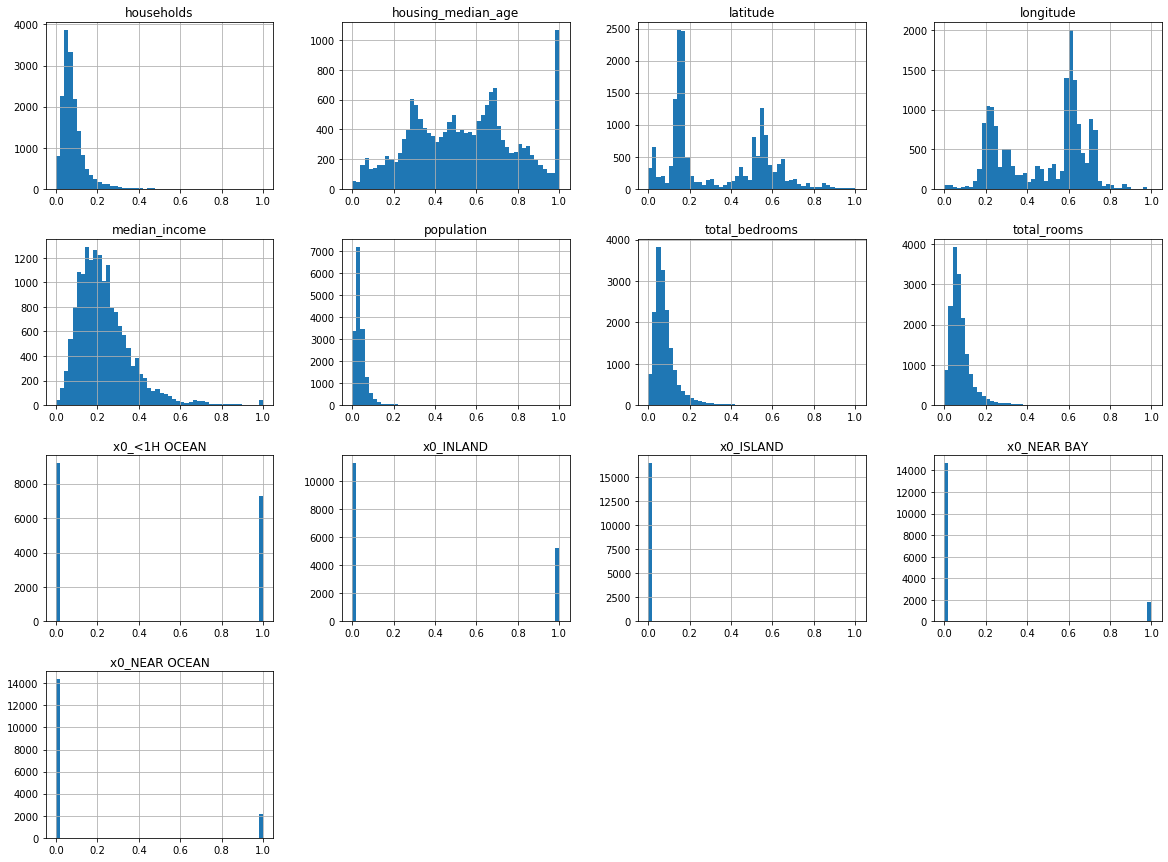

In [23]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,1.003899,-0.840062,-1.795076,-0.977736,-1.098370,-1.047601,-1.135650,0.190012,-0.891506,1.469348,-0.01348,-0.352396,-0.386498
1,-1.434772,0.985364,1.855539,-0.118501,-0.108593,0.052109,-0.136882,0.269311,-0.891506,-0.680574,-0.01348,2.837716,-0.386498
2,0.779481,-0.840062,-0.207852,-0.421680,-0.363175,-0.352955,-0.343433,0.029895,1.121698,-0.680574,-0.01348,-0.352396,-0.386498


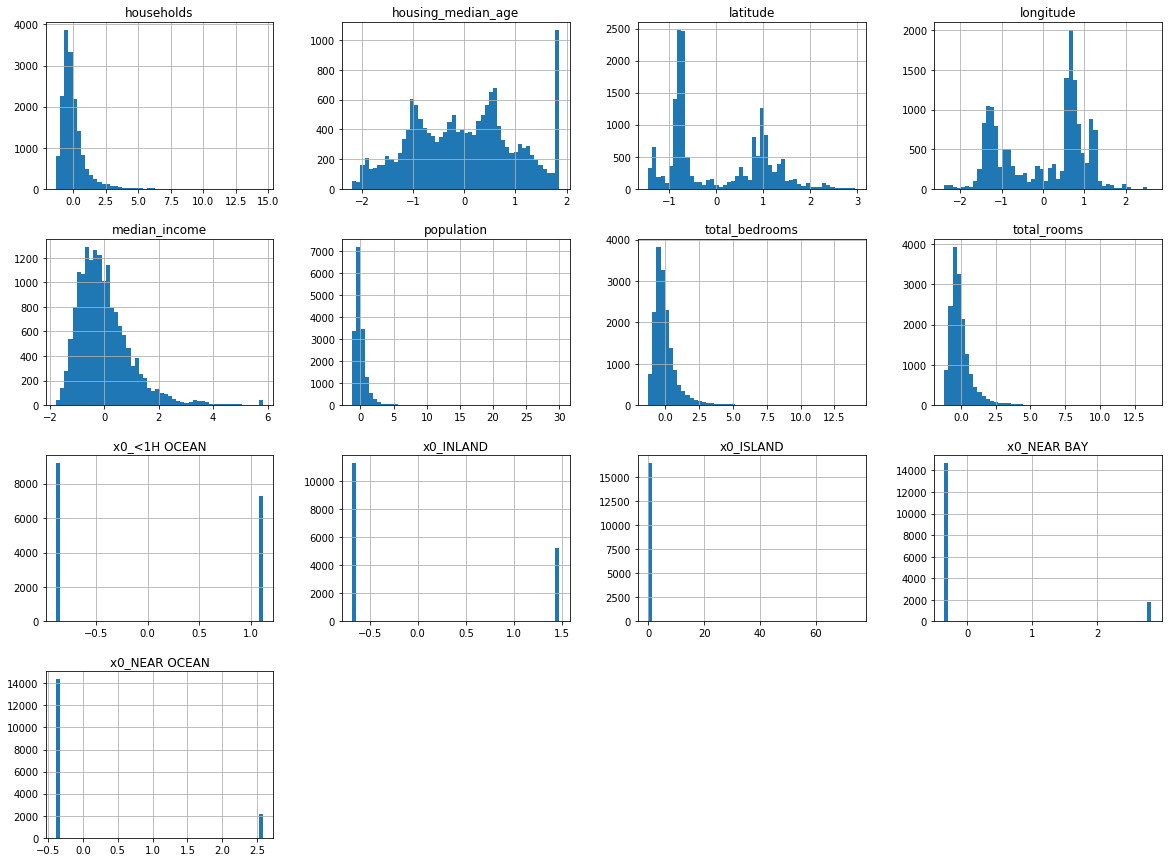

In [25]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
# Import  mean_squere_error and mea_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
MSE = {}
MAE = {}
RMSE={}

In [28]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    MSE[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean_squared_error of {model_name}: {MSE[model_name]}\n")
    RMSE[model_name]=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE: {RMSE[model_name]}\n')
    MAE[model_name]=mean_absolute_error(y_test,y_pred)              
    print(f'Mean_absolute_error: {MAE[model_name]}\n')
    return model, y_pred

In [29]:
# First model LinearRegression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model1 = models(lin_reg, X_train_norm, y_train, X_test_norm, y_test, 'Lin_reg')

Mean_squared_error of Lin_reg: 4718188020.148741

RMSE: 68689.06769019901

Mean_absolute_error: 49700.29941860465



In [30]:
# Second model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model2 = models(svr_linear, X_train_norm, y_train, X_test_norm, y_test, 'Svr_linear')

Mean_squared_error of Svr_linear: 13426569022.109652

RMSE: 115873.07289491227

Mean_absolute_error: 86256.76460378354



In [31]:
# Third model SVR_rbf

SVR_rbf = SVR()
model3 = models(SVR_rbf, X_train_norm, y_train, X_test_norm, y_test, 'SVR_rbf')


Mean_squared_error of SVR_rbf: 13515131225.376991

RMSE: 116254.59657741277

Mean_absolute_error: 86729.7199966766



In [32]:
# Forth model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

ran_for_reg = RandomForestRegressor()
model4 = models(ran_for_reg, X_train_norm, y_train, X_test_norm, y_test, 'Ran_for_reg')

Mean_squared_error of Ran_for_reg: 2317257204.5693374

RMSE: 48137.897799647806

Mean_absolute_error: 31556.990239825584



Text(0, 0.5, 'Testing Accuracy')

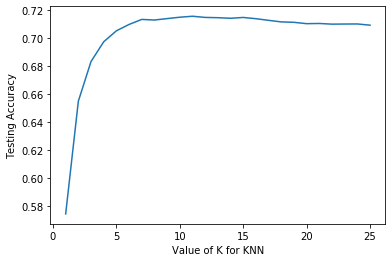

In [33]:
# Fifth model KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
# 5th model KNeighborsRegressor
KNN = KNeighborsRegressor()
model4 = models(KNN, X_train_norm, y_train, X_test_norm, y_test, 'KNN')

Mean_squared_error of KNN: 3964542843.7327228

RMSE: 62964.6158070763

Mean_absolute_error: 42489.448885658916



In [35]:
# 6th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model5 = models(xg_reg, X_train_norm, y_train, X_test_norm, y_test, 'Xg_reg')

Mean_squared_error of Xg_reg: 12957934049.817278

RMSE: 113832.9216431577

Mean_absolute_error: 79099.00313597686



In [36]:
# 7th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model7= models(dec_tree_reg, X_train_norm, y_train, X_test_norm, y_test, 'Dec_tree_reg')

Mean_squared_error of Dec_tree_reg: 4798911185.75

RMSE: 69274.17401708952

Mean_absolute_error: 43706.77713178295



In [37]:
# 8th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)

model8= models(bag_reg_extra_tree, X_train_norm, y_train, X_test_norm, y_test, 'Bag_reg_extra_tree')

Mean_squared_error of Bag_reg_extra_tree: 3038506397.3508406

RMSE: 55122.64867865876

Mean_absolute_error: 37747.664123062015



In [38]:
#9th model RANSACRegressor

from sklearn.linear_model import RANSACRegressor

ransa = RANSACRegressor()

model9= models(ransa, X_train_norm, y_train, X_test_norm, y_test, 'Ransa')

Mean_squared_error of Ransa: 3.2998915476044656e+31

RMSE: 5744468250068465.0

Mean_absolute_error: 126443056979504.72



In [39]:
#10th model lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

model10= models(lasso, X_train_std, y_train, X_test_std, y_test, 'Lasso')


Mean_squared_error of Lasso: 4718228538.404182

RMSE: 68689.36262918868

Mean_absolute_error: 49697.114360055384



C:\Users\User\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2481807904647.922, tolerance: 22099190214.61081
  positive)


In [40]:
# Lets see the results of models of MSE
df_MSE = pd.DataFrame({'Models': list(MSE.keys()),
                          'MSE': list(MSE.values())})
df_MSE

,Models,MSE
0,Lin_reg,4.718188e+09
1,Svr_linear,1.342657e+10
2,SVR_rbf,1.351513e+10
3,Ran_for_reg,2.317257e+09
4,KNN,3.964543e+09
5,Xg_reg,1.295793e+10
6,Dec_tree_reg,4.798911e+09
7,Bag_reg_extra_tree,3.038506e+09
8,Ransa,3.299892e+31
9,Lasso,4.718229e+09


[Text(0, 0.5, 'MSE')]

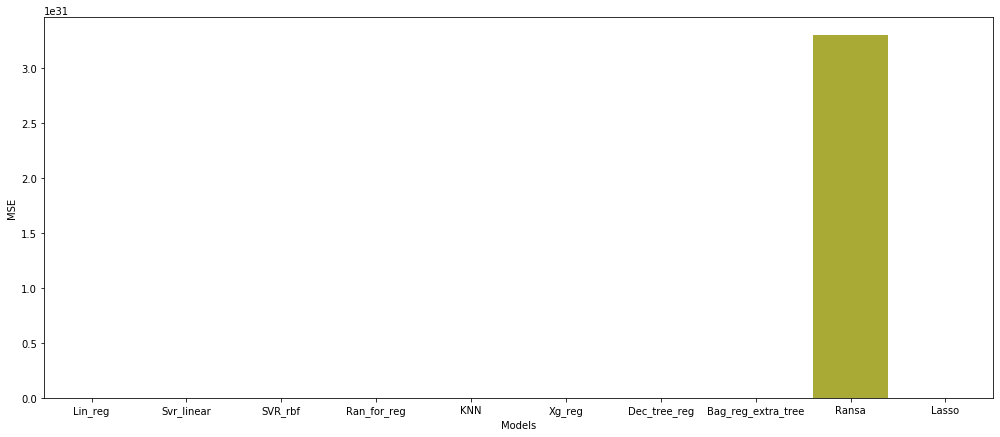

In [41]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "Models", y = "MSE", data = df_MSE)
ax.set(ylabel = "MSE")

In [42]:
# Model with the smalest error
print(f"The model with the smallest Mean_square_error is {min(MSE, key=MSE.get)} and it's error is {MSE[min(MSE, key=MSE.get)]}")

The model with the smallest Mean_square_error is Ran_for_reg and it's error is 2317257204.5693374


In [43]:
# Lets see the results of models of MAE
df_MAE = pd.DataFrame({'Models': list(MAE.keys()),
                          'MAE': list(MAE.values())})
df_MAE

,Models,MAE
0,Lin_reg,4.970030e+04
1,Svr_linear,8.625676e+04
2,SVR_rbf,8.672972e+04
3,Ran_for_reg,3.155699e+04
4,KNN,4.248945e+04
5,Xg_reg,7.909900e+04
6,Dec_tree_reg,4.370678e+04
7,Bag_reg_extra_tree,3.774766e+04
8,Ransa,1.264431e+14
9,Lasso,4.969711e+04


In [44]:
# Model with the smalest error
print(f"The model with the smallest Mean_absolut_error is {min(MAE, key=MAE.get)} and it's error is {MAE[min(MAE, key=MAE.get)]}")

The model with the smallest Mean_absolut_error is Ran_for_reg and it's error is 31556.990239825584


In [45]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
14740,136900.0,163904.00
10101,241300.0,268916.00
20566,200700.0,144892.00
2670,72500.0,82980.00
15709,460000.0,257248.04


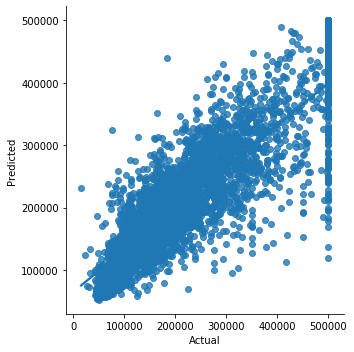

In [46]:
ax = sns.lmplot(x="Actual", y="Predicted", data=df_check)


# THE END